<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/actuaria/metodos_numericos/Metodos_numericos_3p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ajuste de curvas por minimos cuadrados 


# Modelos No-Lineales

## Linealización de modelos 

- Consta de adaptar un modelo y adaptarlo a un polinomio 
- ¿que tan bueno sera el modelo?
    - El coef. de determinación me lo hara saber 


- Se  busca determinar:
    - Modelo de mejor ajuste 
    - Coeficiente de determinación 
    - Grafica de dsiperción y ajuste 

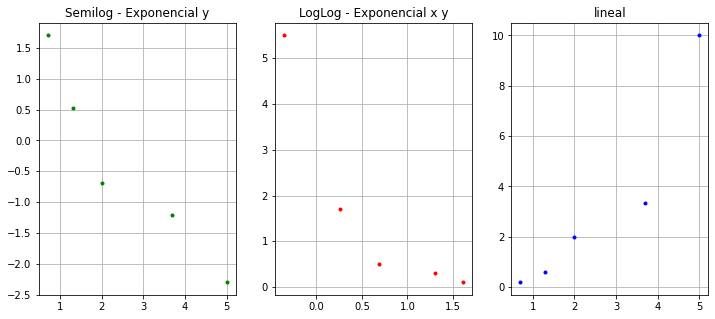

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.array([.7,1.3,2,3.7,5], float)
y = np.array([5.5,1.7,.5,.3,.1], float)

#Graficando 
plt.figure(figsize= (12,5))
plt.subplot(1,3,1)
plt.plot(x,np.log(y), marker = '.', linestyle ='none', color = 'g')
plt.title('Semilog - Exponencial y')
plt.grid()
plt.subplot(1,3,2)
plt.plot(np.log(x),y, marker = '.', linestyle ='none', color = 'r')
plt.title('LogLog - Exponencial x y')
plt.grid()
plt.subplot(1,3,3)
plt.plot(x,1/y, marker = '.', linestyle ='none', color = 'b')
plt.title('lineal')
plt.grid()
plt.show()


n=len(xi)
x=sym.Symbol('x')
s=0
for i in range(0,n):
  p=1
  for j in range(0,n):
    if j!=i:
      p*=(x-xi[j])/(xi[i]-xi[j])
  s+=p*yi[i]    
P=sym.expand(s)
print(P)

polinomio=sym.lambdify(x,P)
pxi=np.linspace(min(xi),max(xi),100)
pyi=polinomio(pxi)
plt.plot(xi,yi, linestyle='none', marker='*')
plt.plot(pxi,pyi,linestyle='-',color='crimson')
plt.grid()
plt.show()



El polinomio es: -0.83106436927663*x
El coeficiente de determinación es -1.2895590292371158e+16%
5.57358097350662*exp(-0.83106436927663*x)


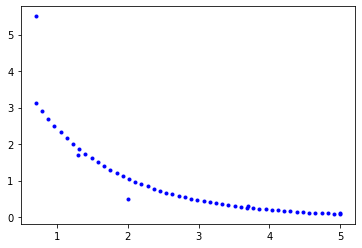

In [20]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
#Obtenemos los datos del polinomio
x=np.array([0.7,1.3,2,3.7,5],float)
y=np.array([5.5,1.7,0.5,0.3,0.1],float)
#Graficamos
#plt.subplot(1,3,1)
#plt.plot(x,np.log(y),marker=".",linestyle="none",color="b")
#plt.subplot(1,3,2)
#plt.plot(np.log(x),np.log(y),marker=".",linestyle="none",color="b")
#plt.subplot(1,3,3)
#plt.plot(y,1/y,marker=".",linestyle="none",color="b")

#plt.grid()
#plt.show()

if len(x)==len(y):
    #Pedir el grado del polinomio y definimos A y b
    #n=input("De que grado va a ser el polinomio? ")
    #n=int(n)
    n=1
    A=np.zeros((n+1,n+1))
    b=np.zeros(n+1)
    y=np.log(y)
    #Llenar los valores de la matriz A y b de acuero al algoritmo
    for i in range(0,n+1):
        b[i]=np.sum(x**i*y)
        for j in range(0,n+1):
            if j>=i:
                A[i,j]=np.sum(x**(i+j))
                A[j,i]=A[i,j]
    #Solucionamos el sistema de ecuaciones
    X=np.matmul(np.linalg.inv(A),b)
    #Llamamos sympy para poder escribir el resultado como polinomio
    x1=sp.Symbol("x")
    p=0
    for i in range(0,n+1):
      p += X[i]*x1*i
    #print(p)
    print('El polinomio es: {}'.format(p))
    pol=sp.lambdify(x1,p)
    r2=np.sum((pol(x)-np.mean(y))*2)/np.sum((y-np.mean(y))*2)
    print("El coeficiente de determinación es {}%".format(r2))
    a=np.exp(X[0])
    beta=X[1]
    mod=a*sp.exp(beta*x1)
    print(mod)
    mod=sp.lambdify(x1,mod)
    plt.plot(x,np.exp(y),marker=".",linestyle="none",color="b")
    x=np.linspace(min(x),max(x),50)
    plt.plot(x,mod(x),marker=".",linestyle="none",color="b")

    plt.show()